In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
dataset = pd.read_csv('social_network_ads.csv')
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]

In [3]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

std_scaler = StandardScaler()
x_train = std_scaler.fit_transform(x_train)
x_test = std_scaler.transform(x_test)

In [4]:
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [5]:
y_pred = classifier.predict(x_test)

In [6]:
print('confusion matrix')
confusion_matrix(y_test, y_pred)

print('accuracy:', accuracy_score(y_test, y_pred))

confusion matrix
accuracy: 0.9


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


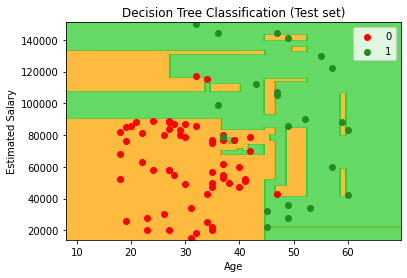

In [10]:
x_set, y_set = std_scaler.inverse_transform(x_test), y_test

x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 10, stop=x_set[:, 0].max() + 10, step=0.25),
                     np.arange(start=x_set[:, 1].min() - 1000, stop=x_set[:, 1].max() + 1000, step=0.25))

plt.contourf(x1, x2, classifier.predict(std_scaler.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'limegreen')))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=ListedColormap(('red', 'forestgreen'))(i), label=j)

plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()